In [1]:
import pandas as pd
import zipfile
import matplotlib.pyplot as pl
import os

%matplotlib inline
os.getcwd()


'C:\\Users\\marcus.ohanlon'

In [3]:
z = zipfile.ZipFile('train.csv.zip')
print(z.namelist())

train = pd.read_csv(z.open('train.csv'), parse_dates=['Dates'])

train['Year'] = train['Dates'].map(lambda x: x.year)
train['Week'] = train['Dates'].map(lambda x: x.week)
train['Hour'] = train['Dates'].map(lambda x: x.hour)

print(train.head())

['train.csv']
                Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  Year  Week  Hour  
0 -122.425892  37.774599  2015    20    23  
1 -122.425892  37.774599  2015    20    23  
2 -

In [4]:
train.dtypes

Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
Year                   int64
Week                   int64
Hour                   int64
dtype: object

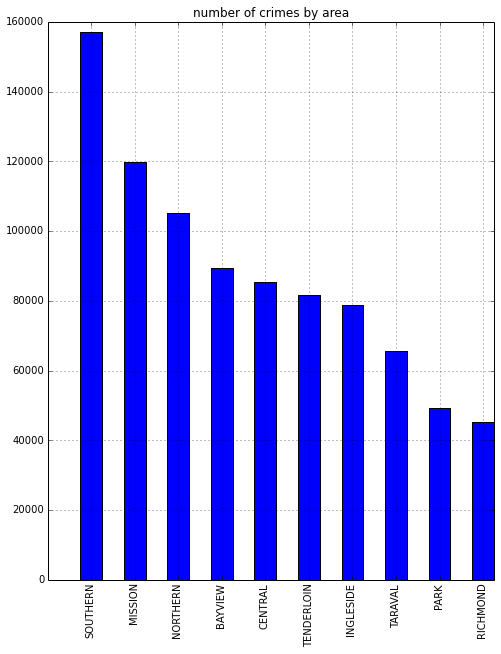

In [19]:
train.PdDistrict.value_counts().plot(kind='bar', figsize=(8,10),title='number of crimes by area')

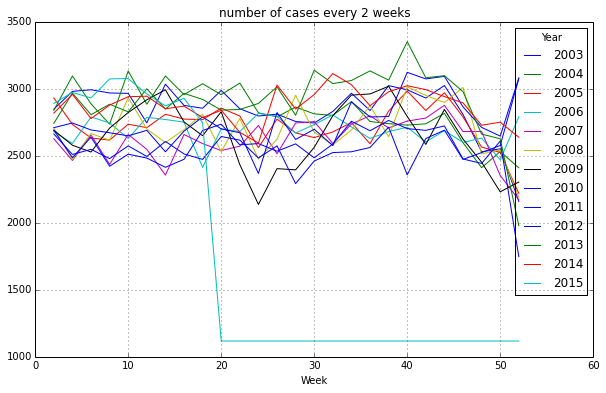

In [9]:
train['event']=1  #add counter column
weekly_events = train[['Week','Year','event']].groupby(['Year','Week']).count().reset_index()
weekly_events_years = weekly_events.pivot(index='Week', columns='Year', values='event').fillna(method='ffill')
#%matplotlib inline
ax = weekly_events_years.interpolate().plot(title='number of cases every 2 weeks', figsize=(10,6))



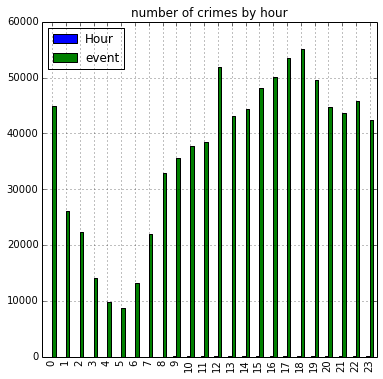

In [21]:
hourly_events = train[['Hour','event']].groupby(['Hour']).count().reset_index()
hourly_events.plot(kind='bar', figsize=(6, 6),title='number of crimes by hour')

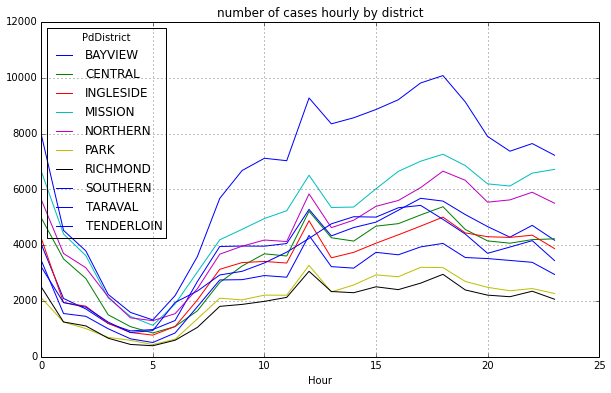

In [18]:
hourly_district_events = train[['PdDistrict','Hour','event']].groupby(['PdDistrict','Hour']).count().reset_index()
hourly_district_events_pivot = hourly_district_events.pivot(index='Hour', columns='PdDistrict', values='event').fillna(method='ffill')
hourly_district_events_pivot.interpolate().plot(title='number of cases hourly by district', figsize=(10,6))

In [32]:

len(pd.unique(train.Descript.ravel()))
#879 Unique Crimes

879

In [70]:
train1 = train[train['Year']==2014] #just analyse 2014 data


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Week,Hour,event
27584,2014-12-28 23:30:00,LARCENY/THEFT,GRAND THEFT PICKPOCKET,Sunday,MISSION,NONE,4100 Block of 18TH ST,-122.435563,37.760801,2014,52,23,1
27585,2014-12-28 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,NORTHERN,NONE,1900 Block of LOMBARD ST,-122.433575,37.800037,2014,52,23,1
27586,2014-12-28 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,CENTRAL,NONE,500 Block of GEARY ST,-122.412777,37.786834,2014,52,23,1
27587,2014-12-28 23:30:00,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Sunday,NORTHERN,"ARREST, BOOKED",0 Block of ROSE ST,-122.421702,37.773641,2014,52,23,1
27588,2014-12-28 23:30:00,ASSAULT,INFLICT INJURY ON COHABITEE,Sunday,NORTHERN,"ARREST, BOOKED",0 Block of ROSE ST,-122.421702,37.773641,2014,52,23,1


In [71]:
tpcrime = train1[['Descript','event']].groupby(['Descript']).count().reset_index()

tpcrime25 = tpcrime.sort_index(by=['event'], ascending=[ False])[:25]


#tpcrime25.event.plot(kind='bar', figsize=(8,10),title='Top Crimes 2014')


,Descript,event
306,GRAND THEFT FROM LOCKED AUTO,7407
214,"DRIVERS LICENSE, SUSPENDED OR REVOKED",2754
423,PETTY THEFT OF PROPERTY,2397
363,LOST PROPERTY,2373
19,"AIDED CASE, MENTAL DISTURBED",2355


In [ ]:
import seaborn

# plot the Ids in 2-dimensions as generated by PCA

plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(clusters_df['dim1'], clusters_df['dim2'], s = 100  ,c= clusters_df['clusterNo'], 
            alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();